# Step 1: Using networkx

In [ ]:
import networkx as nx

In [2]:
# Creates an instance of a networkx graph.
my_first_graph = nx.Graph() 

# Lets add some nodes to the graph
my_first_graph.add_node(1)
my_first_graph.add_node(2)
my_first_graph.add_node(3)

# Now lets add some connections
my_first_graph.add_edge(1, 2)
my_first_graph.add_edge(3, 2)

In [3]:
# Lets find out how many nodes the graph has
num_nodes = len(my_first_graph) # len()  is a python function that can be applied to most lists or sequences
print(num_nodes)

3


In [4]:
# We can also get the degree of any node in the graph
node2_degree = my_first_graph.degree(2)
print("Node 2's degree: ",node2_degree)

# Or we can get the neighbors of any node
node2_neighbors = my_first_graph.neighbors(2)
print("Node 2's neighbors: ", node2_neighbors)

Node 2's degree:  2
Node 2's neighbors:  [1, 3]


In [5]:
# Lets get all the neighbors for each node in the graph
for node in my_first_graph.nodes_iter():
    print("Node", node, "'s neighbors:", my_first_graph.neighbors(node))

Node 1 's neighbors: [2]
Node 2 's neighbors: [1, 3]
Node 3 's neighbors: [2]


In [6]:
# Quick example of iterating over edges
for edge in my_first_graph.edges_iter():
    print(edge)

(1, 2)
(2, 3)


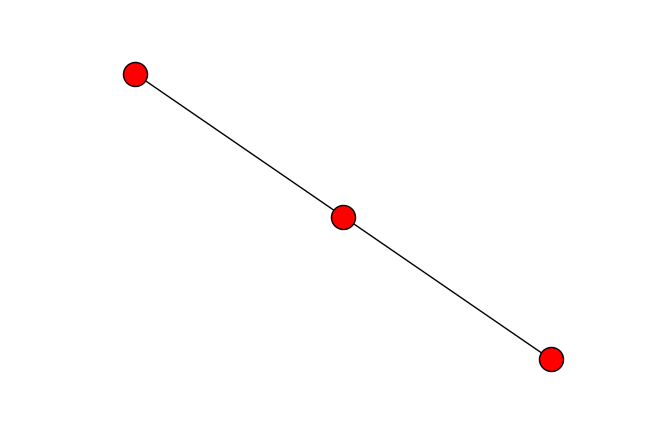

In [7]:
# Draw figures in the notebook
%matplotlib inline
# We will use matplotlib as a backend for the visualization
import matplotlib.pyplot as plt

# Next we will call networkx's draw function on our graph
nx.draw(my_first_graph)

# And then ask matplotlib to show the figure
plt.show()

# Step 2: Friendship paradox example

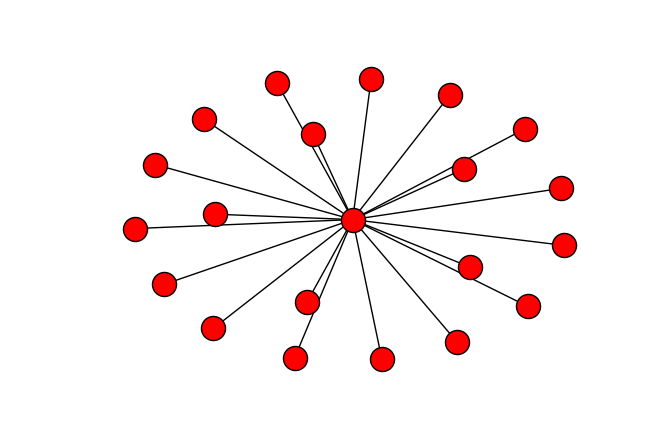

In [9]:
# Use one of networkx's graph generator functions to create a graph
star_graph = nx.star_graph(n=20)
nx.draw(star_graph)
plt.show()

In [10]:
degree_sum = 0.0
for node in star_graph.nodes_iter():
    degree_sum += star_graph.degree(node)
avg_degree = degree_sum / len(star_graph)
print("Average degree", avg_degree)

Average degree 1.9047619047619047


In [11]:
# Now lets do it in one line using numpy
import numpy as np

# Calculate the average degree of the nodes in the graph
avg_degree = np.mean([star_graph.degree(node) for node in star_graph.nodes_iter()])
print("Average degree:",avg_degree)

Average degree: 1.90476190476


In [12]:
# Alternatively we can use use nx.info() to get the average degree
print(nx.info(star_graph))

Name: star_graph(20)
Type: Graph
Number of nodes: 21
Number of edges: 20
Average degree:   1.9048


## Q1: Average neighbor degree

In [23]:
def avg_neb_degree(graph):
    for node in graph.nodes_iter():
        avg_neb_degree = np.mean([graph.degree(neb) for neb in graph.neighbors_iter(node)])
        print ('Average neighbor degree of node', node, 'is', avg_neb_degree)
avg_neb_degree(star_graph)

Average neighbor degree of node 0 is 1.0
Average neighbor degree of node 1 is 20.0
Average neighbor degree of node 2 is 20.0
Average neighbor degree of node 3 is 20.0
Average neighbor degree of node 4 is 20.0
Average neighbor degree of node 5 is 20.0
Average neighbor degree of node 6 is 20.0
Average neighbor degree of node 7 is 20.0
Average neighbor degree of node 8 is 20.0
Average neighbor degree of node 9 is 20.0
Average neighbor degree of node 10 is 20.0
Average neighbor degree of node 11 is 20.0
Average neighbor degree of node 12 is 20.0
Average neighbor degree of node 13 is 20.0
Average neighbor degree of node 14 is 20.0
Average neighbor degree of node 15 is 20.0
Average neighbor degree of node 16 is 20.0
Average neighbor degree of node 17 is 20.0
Average neighbor degree of node 18 is 20.0
Average neighbor degree of node 19 is 20.0
Average neighbor degree of node 20 is 20.0


## Q2: Viewing the friendship paradox

In [21]:
# define a function to calculate the fraction of nodes that have a large degree neighbor degree than their own
def neb_degree_fr(graph):   
    count = 0
    for node in graph.nodes_iter():
        avg_neb_degree = np.mean([graph.degree(neb) for neb in graph.neighbors_iter(node)])
        if graph.degree(node) < avg_neb_degree:
            count += 1
    print('Fraction of nodes that have a larger average neighbor degree than their own:', count/len(graph))  
neb_degree_fr(star_graph)

Fraction of nodes that have a larger average neighbor degree than their own: 0.9523809523809523


# Step 3: Friendship paradox assignment

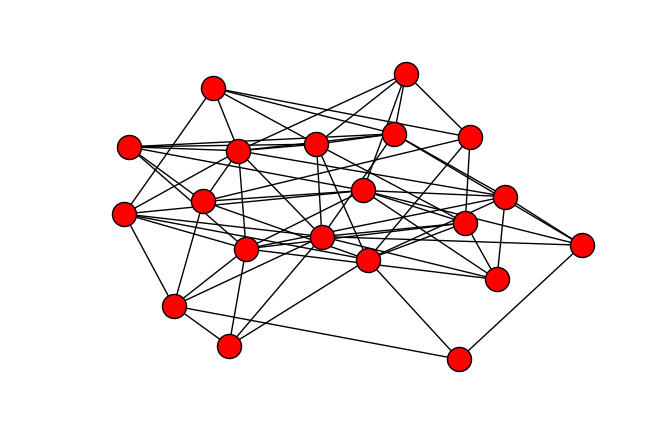

In [18]:
# Draw a random graph with 20 nodes and a connection
# probability of 0.3
rnd_graph = nx.erdos_renyi_graph(n=20, p=0.3)
nx.draw(rnd_graph)
plt.show()

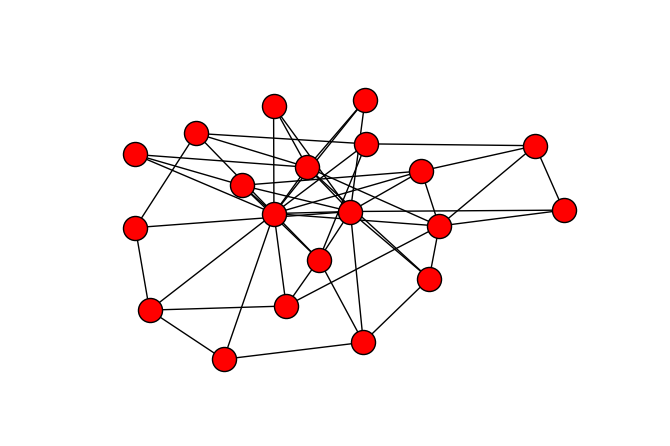

In [19]:
# Draw a scale-free graph with 20 nodes
sf_graph = nx.barabasi_albert_graph(n=20, m=3)
nx.draw(sf_graph)
plt.show()

## Q3: Scale-free graph

### 1. What is the average degree of the graph?

In [20]:
avg_degree = np.mean([sf_graph.degree(node) for node in sf_graph.nodes_iter()])
print("Average degree:",avg_degree)

Average degree: 5.1


### 2. What fraction of nodes in the graph have a larger average neighbor degree than their degree?

In [22]:
neb_degree_fr(sf_graph)

Fraction of nodes that have a larger average neighbor degree than their own: 0.8


### 3. Did the friendship paradox occur in the scale-free graph? If so, why did it? If not, why not? 

In [26]:
print('Yes. 80% of nodes have more polular neighbors. This is because for scale-free graph, there are a few very high degree', 
    'nodes that have higher probabilities to become neighbors of other nodes. So they would increase the average of the',
    'neighbor degree.')

Yes. 80% of nodes have more polular neighbors. This is because for scale-free graph, there are a few very high degree nodes that have higher probabilities to become neighbors of other nodes. So they would increase the average of the neighbor degree.


## Q4: Random graph

In [28]:
#For the erdos-renyi graph use the parameters n=200 and p=0.2.
rnd_graph = nx.erdos_renyi_graph(n=200, p=0.2)

### 1. What is the average degree of the graph?

In [29]:
avg_degree = np.mean([rnd_graph.degree(node) for node in rnd_graph.nodes_iter()])
print("Average degree:",avg_degree)

Average degree: 39.56


### 2. What fraction of nodes in the graph have a larger average neighbor degree than their degree?

In [30]:
neb_degree_fr(rnd_graph)

Fraction of nodes that have a larger average neighbor degree than their own: 0.53


### 3. Did the friendship paradox occur in the scale-free graph? If so, why did it? If not, why not? 

In [37]:
print("It seems no. About 50% of nodes have more polular neighbors. This is because for random graph, each node has similar "
      "number of neighbors. So nodes should have about the same number of neighbors as their neighbors' neighbors.")

It seems no. About 50% of nodes have more polular neighbors. This is because for random graph, each node has similar number of neighbors. So nodes should have about the same number of neighbors as their neighbors' neighbors.
